In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
import seaborn as sns

In [8]:
df = pd.read_csv("Iris.csv")

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:

# Identify the independent variables (features) and the dependent variable (target)
X = df.drop(columns=['Species'])
y = df['Species']

# Encode the dependent variable
# Encode 'iris-setosa' as 0 and 'iris-versicolour' and 'iris-virginica' as 1
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Mapping: iris-setosa -> 0, iris-versicolour and iris-virginica -> 1
y_binary = (y_encoded != 0).astype(int)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Train a classifier on the training set
# we use Logistic Regression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Confusion Matrix:
[[10  0]
 [ 0 20]]


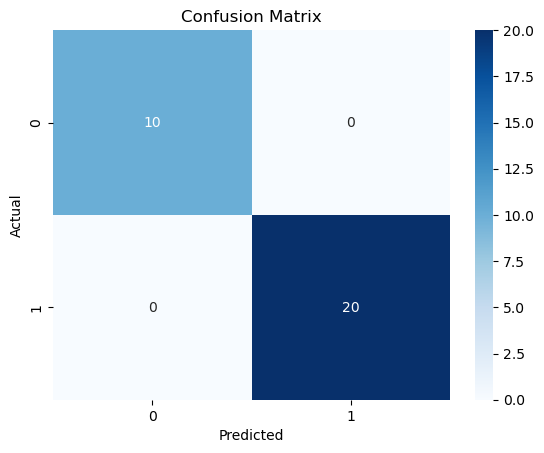

Precision: 1.00
Recall: 1.00
Classification Report:
                 precision    recall  f1-score   support

    iris-setosa       1.00      1.00      1.00        10
not-iris-setosa       1.00      1.00      1.00        20

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [16]:
# Generate and analyze the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['iris-setosa', 'not-iris-setosa']))

SyntaxError: invalid syntax (699193220.py, line 1)

In [19]:
# Define a function to calculate accuracy
def calculate_accuracy(y_true, y_pred):
    correct_predictions = (y_true == y_pred).sum()
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy

# Define a function to calculate precision
def calculate_precision(y_true, y_pred):
    true_positives = ((y_pred == 1) & (y_true == 1)).sum()
    false_positives = ((y_pred == 1) & (y_true == 0)).sum()
    precision = true_positives / (true_positives + false_positives)
    return precision

# Define a function to calculate recall
def calculate_recall(y_true, y_pred):
    true_positives = ((y_pred == 1) & (y_true == 1)).sum()
    false_negatives = ((y_pred == 0) & (y_true == 1)).sum()
    recall = true_positives / (true_positives + false_negatives)
    return recall

# Calculate accuracy, precision, and recall
accuracy = calculate_accuracy(y_test, y_pred)
precision = calculate_precision(y_test, y_pred)
recall = calculate_recall(y_test, y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

# Check if the prediction was right
correct_predictions = (y_test == y_pred)
print(f'Correct Predictions: {correct_predictions.sum()}/{len(y_test)}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
Correct Predictions: 30/30
